## Which hospital group in the Austin/San Antonio area is the best value?

### 1.1 Motivation
The Centers for Medicar and Medicaid Services require hospitals to publish a list of prices on their websites. Whithout strong guidance, hospitals publish the files in different formats and with different breakdown of their prices. In most cases, the file is not easily accesible in their websites. It takes some seaching to find them.

### 1.2 

### 1.3

### 1.4

### Acknowledgements
This work is based on the work of *Nathan Sutton*. He started a repository for price transparency of hospitals in North Carolina. You can find his repository [here](https://github.com/nathansutton/hospital-price-transparency). Nate is also my mentor.

#### by Rogelio Montemayor

### 2. Library Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('dark')

from sqlalchemy import create_engine

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### 3 Import Data
Once the container is running, we are ready to connect to the postgres database

In [2]:
db_string = f'postgresql://builder@localhost:5432/postgres'
engine = create_engine(db_string)

In [75]:
with engine.connect() as con:
    df = pd.read_sql_query("""
    SELECT p.concept_id,
           c.concept_name AS procedure,
           p.price,
           p.amount,
           p.hospital_id,
           h.hospital_name,
           h.affiliation AS hospital_group
      FROM price p
      JOIN hospital h
           USING(hospital_id)
      JOIN concept c
           ON c.concept_id = p.concept_id
      ORDER BY 5
      """, con)

display(df.head())

concept_id  \
0     2617022   
1      953240   
2    40664483   
3     2718314   
4     2718308   

                                                                                                                      procedure  \
0  Manual wheelchair accessory, handrim without projections (includes ergonomic or contoured), any type, replacement only, each   
1                                                                         Injection, crotalidae immune f(ab')2 (equine), 120 mg   
2                                                                     Injection, collagenase, clostridium histolyticum, 0.01 mg   
3                                                                                Injection, colistimethate sodium, up to 150 mg   
4                                                                                      Injection, clonidine hydrochloride, 1 mg   

  price     amount  hospital_id            hospital_name    hospital_group  
0   min    30.8380            2  ASCENSION SETON BASTROP  Ascencion Health  
1   min  3195.7656            2  ASCENSION SETON BASTROP  Ascencion Health  
2   min   109.4869            2  ASCENSION SETON BASTROP  Ascencion Health  
3   min    50.8905            2  ASCENSION SETON BASTROP  Ascencion Health  
4   min    36.6096            2  ASCENSION SETON BASTROP  Ascencion Health

In [78]:
display(df.shape)

(948337, 7)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948337 entries, 0 to 948336
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   concept_id      948337 non-null  int64  
 1   procedure       948337 non-null  object 
 2   price           948337 non-null  object 
 3   amount          948337 non-null  float64
 4   hospital_id     948337 non-null  int64  
 5   hospital_name   948337 non-null  object 
 6   hospital_group  948337 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 50.6+ MB


In [80]:
display(df.describe())

concept_id        amount    hospital_id
count  9.483370e+05  9.483370e+05  948337.000000
mean   7.523852e+06  6.616047e+03      39.127176
std    1.326917e+07  1.902805e+04      21.801843
min    2.800000e+02  2.500000e-03       2.000000
25%    2.212320e+06  1.857700e+02      18.000000
50%    2.615740e+06  1.073000e+03      43.000000
75%    2.718563e+06  5.100000e+03      56.000000
max    4.625776e+07  2.170900e+06      76.000000

In [7]:
# According to H-CUP for 2018
common_codes = [2105103, 2110308, 2104836, 43527994, 42742494, 2104281, 2109065, 2110644, 2101925, 2105545]
common_codes.sort()

In [8]:
short_names = ['debridement', 'fixation', 'hip arthroplasty', 'knee arthroplasty', 'ostectomy',
              'colectomy', 'episiotomy', 'discectomy', 'arthrodesis', 'angioplasty']

In [9]:
def search_code_and_plot(code, price='max'):
    temp_df = df[(df.concept_id == code) & (df.price == price)]
    temp_df = temp_df.drop_duplicates(subset=['procedure', 'price', 'hospital_id'])
    procedure = temp_df.procedure.values[0]
    plt.barh('hospital_name', 'amount', data=temp_df)
    plt.title(f'{procedure}', fontweight='bold')
    plt.show()

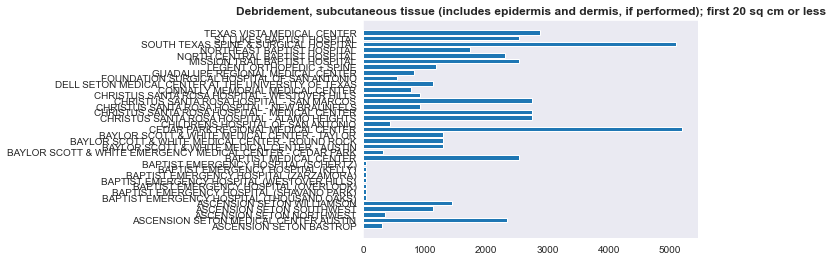

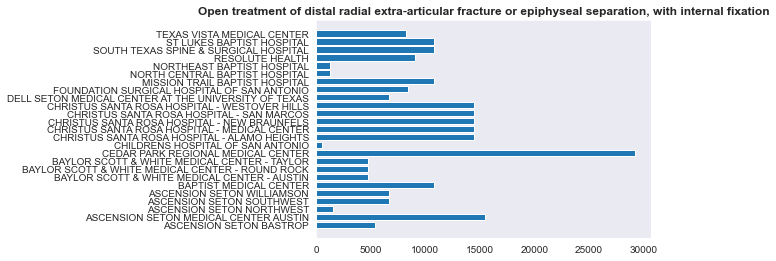

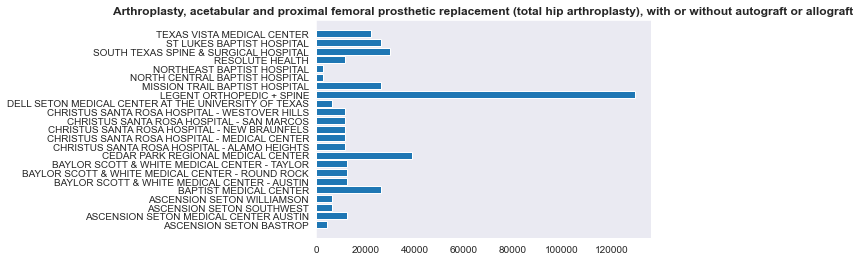

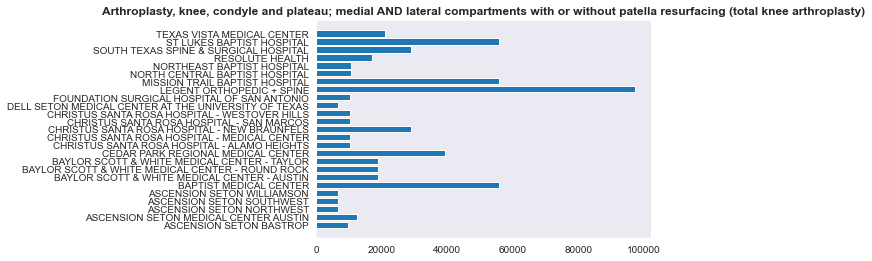

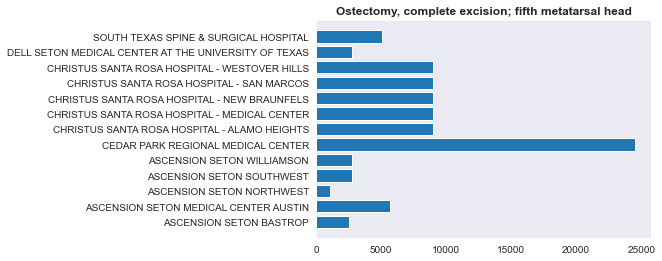

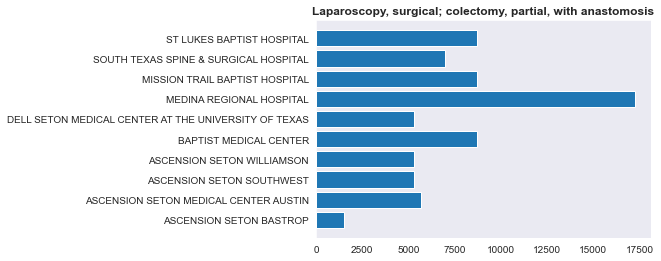

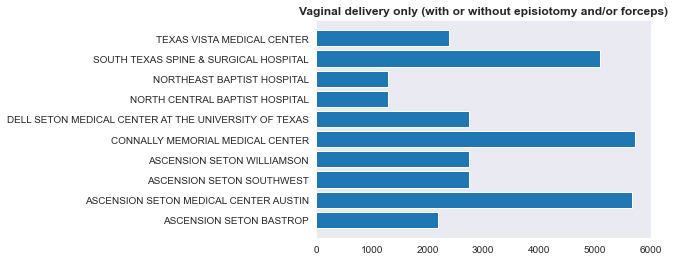

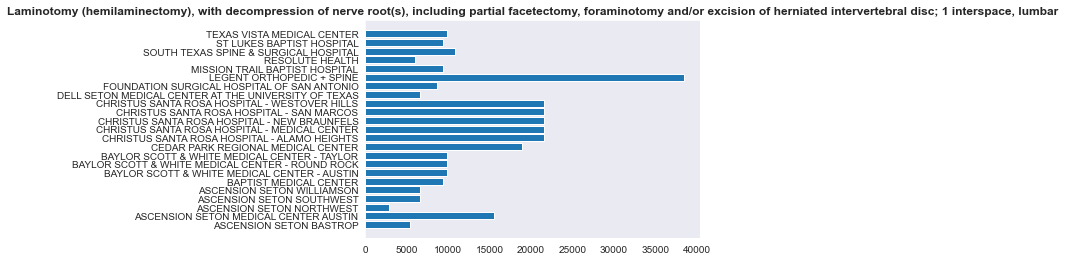

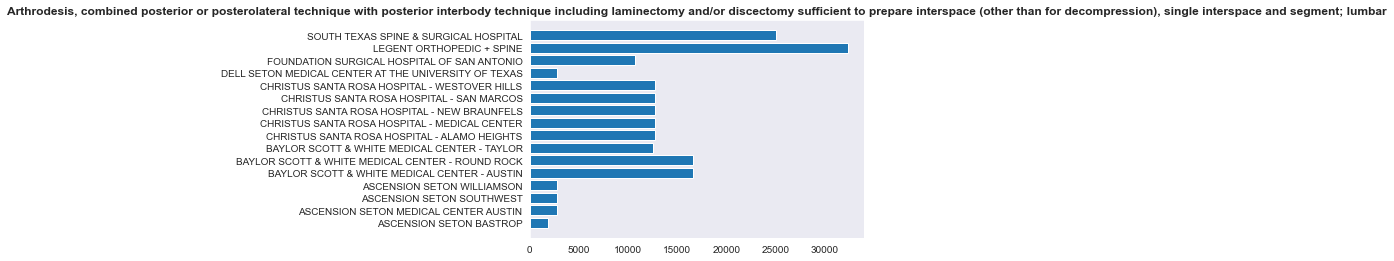

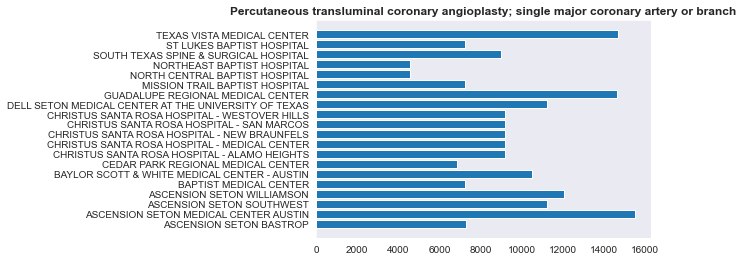

In [10]:
for code in common_codes:
    search_code_and_plot(code)
    plt.show()

In [11]:
all_codes = df.concept_id.unique()
len(all_codes)

16120

In [12]:
p_codes = []
for code in all_codes:
    if len(df.loc[df.concept_id == code, 'hospital_group'].value_counts().values) > 12:
        p_codes.append(code)

In [13]:
len(p_codes)

30

In [14]:
p_codes.sort()
popular = df.concept_id.isin(p_codes)
popular_procedures = df[popular]

In [15]:
popular_procedures

concept_id                                          procedure  price  \
1637       2211424  Computed tomography, pelvis; with contrast mat...    min   
2547       2212731                                   Prothrombin time    max   
2605       2212096  Renal function panel This panel must include t...    max   
2647      41954152                                       Pancheraccia    max   
2703       2313773  Motion fluoroscopic evaluation of swallowing f...    min   
2746       2212731                                   Prothrombin time    min   
2797       2212096  Renal function panel This panel must include t...    min   
2817      41954152                                       Pancheraccia    min   
3779       2212542             Prostate specific antigen (PSA); total    max   
3780       2212572                                      Sodium; urine    max   
3788       2212737         Sedimentation rate, erythrocyte; automated    max   
4454       2211424  Computed tomography, pelvis; with contrast mat...    max   
4731       2212737         Sedimentation rate, erythrocyte; automated    min   
4739       2212572                                      Sodium; urine    min   
4740       2212542             Prostate specific antigen (PSA); total    min   
6305       2212593                  Thyroid stimulating hormone (TSH)    max   
6346       2212090  Basic metabolic panel (Calcium, total) This pa...    max   
6672       2212095  Lipid panel This panel must include the follow...    min   
6848      41939096                                  Cornillon-Confoux    max   
7336       2313773  Motion fluoroscopic evaluation of swallowing f...    max   
7461      41939096                                  Cornillon-Confoux    min   
8522       2212090  Basic metabolic panel (Calcium, total) This pa...    min   
8553       2212593                  Thyroid stimulating hormone (TSH)    min   
9094       2212095  Lipid panel This panel must include the follow...    max   
11631       725068         Radiologic examination, chest; single view    max   
11743      2212649  Blood count; complete (CBC), automated (Hgb, H...    min   
11778      2212166  Urinalysis, by dip stick or tablet reagent for...    min   
11783      2212124                                   Phenytoin; total    min   
12145       725068         Radiologic examination, chest; single view    min   
14147      2211765                           Ultrasound, transvaginal    max   
14286      2211353  Magnetic resonance (eg, proton) imaging, brain...    min   
14289      2211327  Computed tomography, head or brain; without co...    min   
14514      2211327  Computed tomography, head or brain; without co...    max   
15519      2212649  Blood count; complete (CBC), automated (Hgb, H...    max   
15561      2212166  Urinalysis, by dip stick or tablet reagent for...    max   
15566      2212124                                   Phenytoin; total    max   
15950      2211353  Magnetic resonance (eg, proton) imaging, brain...    max   
16105      2211765                           Ultrasound, transvaginal    min   
17432      2213039  Smear, primary source with interpretation; Gra...    max   
17889      2212453                                          Magnesium    min   
19346      2212470                                Natriuretic peptide    max   
19567      2213039  Smear, primary source with interpretation; Gra...    min   
19970      2212453                                          Magnesium    max   
20005      2212996  Culture, bacterial; quantitative colony count,...    max   
20029      2314285  Therapeutic procedure, 1 or more areas, each 1...    max   
20348      2212996  Culture, bacterial; quantitative colony count,...    min   
20366      2314285  Therapeutic procedure, 1 or more areas, each 1...    min   
20554      2314294  Therapeutic activities, direct (one-on-one) pa...    min   
20742      2212093  Comprehensive metabolic panel This panel must ...    max   
20844   

In [16]:
popular_procedures.shape

(6571, 7)

In [27]:
with engine.connect() as con:
    df2 = pd.read_sql_query("""
    SELECT DISTINCT
           p.concept_id, 
           c.concept_name,
           CEILING(CASE WHEN p.price = 'max' AND h.affiliation = 'Ascencion Health' THEN p.amount ELSE NULL END) AS "Ascencion",
           CEILING(CASE WHEN p.price = 'max' AND h.affiliation = 'Tenet Health' THEN p.amount ELSE NULL END) AS "Tenet",
           CEILING(CASE WHEN p.price = 'max' AND h.affiliation = 'Baylor Scott & White Health' THEN p.amount ELSE NULL END) AS "Baylor",
           CEILING(CASE WHEN p.price = 'max' AND h.affiliation = 'Christus Health' THEN p.amount ELSE NULL END) AS "Christus",
           CEILING(CASE WHEN p.price = 'cash' AND h.affiliation = 'HCA Healthcare' THEN p.amount ELSE NULL END) AS "HCA",
           CEILING(CASE WHEN p.price = 'gross' AND h.affiliation = 'University Health System' THEN p.amount ELSE NULL END) AS "University"
      FROM price p
      JOIN hospital h
           USING(hospital_id)
      JOIN concept c
           ON c.concept_id = p.concept_id
     WHERE p.concept_id IN (725068, 2211327, 2211353, 2211424, 2211765, 2212090, 2212093, 2212095,
                            2212096, 2212099, 2212124, 2212166, 2212453, 2212470, 2212523, 2212542,
                            2212572, 2212593, 2212649, 2212731, 2212737, 2212980, 2212996, 2213039,
                            2313773, 2314284, 2314285, 2314294, 41939096, 41954152)
      """, con)

df2.head()

concept_id                                concept_name  Ascencion  Tenet  \
0      725068  Radiologic examination, chest; single view       22.0    NaN   
1      725068  Radiologic examination, chest; single view       60.0    NaN   
2      725068  Radiologic examination, chest; single view      200.0    NaN   
3      725068  Radiologic examination, chest; single view     1462.0    NaN   
4      725068  Radiologic examination, chest; single view        NaN   50.0   

   Baylor  Christus  HCA  University  
0     NaN       NaN  NaN         NaN  
1     NaN       NaN  NaN         NaN  
2     NaN       NaN  NaN         NaN  
3     NaN       NaN  NaN         NaN  
4     NaN       NaN  NaN         NaN

In [28]:
df2.shape

(743, 8)

In [29]:
df3 = df2.drop('concept_name', axis=1)
df3

concept_id  Ascencion   Tenet  Baylor  Christus      HCA  University
0        725068       22.0     NaN     NaN       NaN      NaN         NaN
1        725068       60.0     NaN     NaN       NaN      NaN         NaN
2        725068      200.0     NaN     NaN       NaN      NaN         NaN
3        725068     1462.0     NaN     NaN       NaN      NaN         NaN
4        725068        NaN    50.0     NaN       NaN      NaN         NaN
5        725068        NaN    80.0     NaN       NaN      NaN         NaN
6        725068        NaN   149.0     NaN       NaN      NaN         NaN
7        725068        NaN   198.0     NaN       NaN      NaN         NaN
8        725068        NaN   322.0     NaN       NaN      NaN         NaN
9        725068        NaN   520.0     NaN       NaN      NaN         NaN
10       725068        NaN   928.0     NaN       NaN      NaN         NaN
11       725068        NaN     NaN   173.0       NaN      NaN         NaN
12       725068        NaN     NaN   266.0       NaN      NaN         NaN
13       725068        NaN     NaN     NaN     329.0      NaN         NaN
14       725068        NaN     NaN     NaN     432.0      NaN         NaN
15       725068        NaN     NaN     NaN     591.0      NaN         NaN
16       725068        NaN     NaN     NaN     710.0      NaN         NaN
17       725068        NaN     NaN     NaN     746.0      NaN         NaN
18       725068        NaN     NaN     NaN       NaN    120.0         NaN
19       725068        NaN     NaN     NaN       NaN    624.0         NaN
20       725068        NaN     NaN     NaN       NaN    710.0         NaN
21       725068        NaN     NaN     NaN       NaN    760.0         NaN
22       725068        NaN     NaN     NaN       NaN    767.0         NaN
23       725068        NaN     NaN     NaN       NaN    823.0         NaN
24       725068        NaN     NaN     NaN       NaN    864.0         NaN
25       725068        NaN     NaN     NaN       NaN      NaN       368.0
26       725068        NaN     NaN     NaN       NaN      NaN         NaN
27      2211327      110.0     NaN     NaN       NaN      NaN         NaN
28      2211327      368.0     NaN     NaN       NaN      NaN         NaN
29      2211327     1462.0     NaN     NaN       NaN      NaN         NaN
30      2211327     1624.0     NaN     NaN       NaN      NaN         NaN
31      2211327        NaN   198.0     NaN       NaN      NaN         NaN
32      2211327        NaN   220.0     NaN       NaN      NaN         NaN
33      2211327        NaN   584.0     NaN       NaN      NaN         NaN
34      2211327        NaN   714.0     NaN       NaN      NaN         NaN
35      2211327        NaN  1313.0     NaN       NaN      NaN         NaN
36      2211327        NaN  1819.0     NaN       NaN      NaN         NaN
37      2211327        NaN  2912.0     NaN       NaN      NaN         NaN
38      2211327        NaN     NaN  1539.0       NaN      NaN         NaN
39      2211327        NaN     NaN  1588.0       NaN      NaN         NaN
40      2211327        NaN     NaN     NaN     742.0      NaN         NaN
41      2211327        NaN     NaN     NaN    1243.0      NaN         NaN
42      2211327        NaN     NaN     NaN    1257.0      NaN         NaN
43      2211327        NaN     NaN     NaN    1432.0      NaN         NaN
44      2211327        NaN     NaN     NaN    1739.0      NaN         NaN
45      2211327        NaN     NaN     NaN       NaN    876.0         NaN
46      2211327        NaN     NaN     NaN       NaN   1952.0         NaN
47      2211327        NaN     NaN     NaN       NaN   3991.0         NaN
48      2211327        NaN     NaN     NaN       NaN   4166.0         NaN
49      2211327        NaN     NaN     NaN       NaN   4673.0         NaN
50      2211327        NaN     NaN     NaN       NaN   4862.0         NaN
51      2211327        NaN     NaN     NaN       NaN   4923.0         NaN
52      2211327        NaN     NaN     NaN       NaN   5105.0         NaN
53      2

In [30]:
data = {}
for i, code in enumerate(p_codes):
    data[p_codes[i]] = df3[df3.concept_id == code].median(axis=0)[1:]

In [31]:
pivot_table = pd.DataFrame(data)
pivot_table

725068    2211327   2211353   2211424   2211765   2212090   \
Ascencion      130.0     915.0    1465.0     812.0     353.0      29.5   
Tenet          198.0     714.0     805.5     474.0     157.0     160.0   
Baylor         219.5    1563.5    3442.0    1915.0     490.5     170.0   
Christus       591.0    1257.0    1656.0     901.5     439.5     252.5   
HCA            760.0    4419.5    7828.0    4725.5     992.0     798.5   
University     368.0    1928.0    5063.0    2386.0     467.0      92.0   

            2212093   2212095   2212096   2212099   2212124   2212166   \
Ascencion       36.5      46.0      30.0      28.5      45.5      11.5   
Tenet          407.0      61.0      29.0      41.0      46.0      35.5   
Baylor         216.0     126.5     117.0     248.0     178.5      43.5   
Christus       317.0      82.0      48.0      46.0      16.0     108.0   
HCA           1005.0     753.0     831.5     934.0     560.5     295.0   
University     140.0     107.0     129.0     107.0     142.0      39.0   

            2212453   2212470   2212523   2212542   2212572   2212593   \
Ascencion       23.5     116.0      16.5      63.0      17.0      57.5   
Tenet           31.0      67.5      50.0      29.0      11.0     107.0   
Baylor         100.5     237.0      55.0     171.0      44.5     125.0   
Christus        84.0     178.0      53.0      83.0       6.0     183.5   
HCA            299.0     525.0     269.0     438.5     202.0     603.0   
University     146.0     117.0      54.0     171.0      27.0      83.0   

            2212649   2212731   2212737   2212980   2212996   2213039   \
Ascencion       22.5      14.0       9.5      35.5      27.5      15.0   
Tenet           63.0      32.0      15.0     113.0      43.0      16.0   
Baylor         100.0      68.0      77.0     178.0     126.0      66.0   
Christus       137.5      66.0      52.0     227.0     227.0      91.0   
HCA            279.0     304.0     278.0     661.0     471.0     223.0   
University      41.0     131.0      30.0      70.0      76.0      68.0   

            2313773   2314284   2314285   2314294   41939096  41954152  
Ascencion      286.0      95.0     104.0     114.5    1465.0     353.0  
Tenet          224.0      35.5      27.0      43.5     805.5     157.0  
Baylor         450.0     137.0     144.0     159.0    3442.0     490.5  
Christus       248.0      95.0      99.0     143.0    1656.0     439.5  
HCA            632.0     360.0     374.0     398.5    7828.0     992.0  
University     387.0     165.0     164.0     165.0    5063.0     467.0

In [40]:
pivot_table = pivot_table.reindex(['HCA', 'University', 'Baylor', 'Christus', 'Ascencion', 'Tenet'])

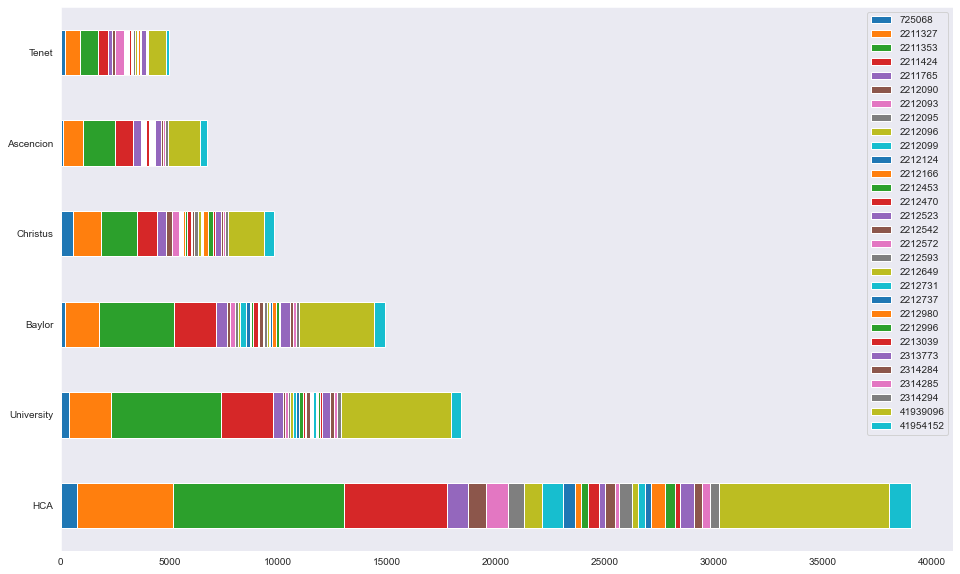

In [41]:
pivot_table.plot(kind='barh', stacked=True, figsize=(16,10))
plt.show()

In [36]:
procedures = [df2.concept_name[df2.concept_id == code].values[0] for code in p_codes]

In [37]:
legend = pd.DataFrame({'code_id' : p_codes, 'procedure': procedures})
legend

code_id                                          procedure
0     725068         Radiologic examination, chest; single view
1    2211327  Computed tomography, head or brain; without co...
2    2211353  Magnetic resonance (eg, proton) imaging, brain...
3    2211424  Computed tomography, pelvis; with contrast mat...
4    2211765                           Ultrasound, transvaginal
5    2212090  Basic metabolic panel (Calcium, total) This pa...
6    2212093  Comprehensive metabolic panel This panel must ...
7    2212095  Lipid panel This panel must include the follow...
8    2212096  Renal function panel This panel must include t...
9    2212099  Hepatic function panel This panel must include...
10   2212124                                   Phenytoin; total
11   2212166  Urinalysis, by dip stick or tablet reagent for...
12   2212453                                          Magnesium
13   2212470                                Natriuretic peptide
14   2212523                   Phosphorus inorganic (phosphate)
15   2212542             Prostate specific antigen (PSA); total
16   2212572                                      Sodium; urine
17   2212593                  Thyroid stimulating hormone (TSH)
18   2212649  Blood count; complete (CBC), automated (Hgb, H...
19   2212731                                   Prothrombin time
20   2212737         Sedimentation rate, erythrocyte; automated
21   2212980  Culture, bacterial; blood, aerobic, with isola...
22   2212996  Culture, bacterial; quantitative colony count,...
23   2213039  Smear, primary source with interpretation; Gra...
24   2313773  Motion fluoroscopic evaluation of swallowing f...
25   2314284  Therapeutic procedure, 1 or more areas, each 1...
26   2314285  Therapeutic procedure, 1 or more areas, each 1...
27   2314294  Therapeutic activities, direct (one-on-one) pa...
28  41939096                                  Cornillon-Confoux
29  41954152                                       Pancheraccia

In [73]:
hospital_groups = ['HCA Healthcare', 'University Health System', 'Baylor Scott & White Health', 'Christus Health', 'Ascencion Health', 'Tenet Health']
for hospital_group in hospital_groups:
    print(f'{hospital_group:^40s}')
    print('-'*40)
    print(*df.hospital_name[df.hospital_group == hospital_group].unique().tolist(), sep='\n')
    print()

             HCA Healthcare             
----------------------------------------
HEART HOSPITAL OF AUSTIN, A CAMPUS OF ST DAVIDS MEDICAL CENTER
METHODIST AMBULATORY SURGERY HOSPITAL-NORTHWEST
METHODIST HOSPITAL
METHODIST HOSPITAL SOUTH
METHODIST HOSPITAL STONE OAK REHABILITATION CENTER
METHODIST SPECIALTY & TRANSPLANT HOSPITAL
METHODIST STONE OAK  HOSPITAL
METHODIST TEXSAN HOSPITAL, A METHODIST HOSPITAL FACILITY
METROPOLITAN METHODIST HOSPITAL
NORTH AUSTIN MEDICAL CENTER
NORTHEAST METHODIST HOSPITAL
ROUND ROCK  MEDICAL CENTER
ST DAVIDS GEORGETOWN HOSPITAL  A ST DAVIDS MEDICAL CENTER FACILI
ST DAVIDS MEDICAL CENTER
ST DAVIDS REHABILITATION HOSPITAL, A ST DAVIDS  MEDICAL CENTER
ST DAVIDS SOUTH AUSTIN MEDICAL CENTER
ST DAVIDS SURGICAL HOSPITAL A CAMPUS OF NORTH AUSTIN MEDICAL CTR

        University Health System        
----------------------------------------
UNIVERSITY HOSPITAL SYSTEM

      Baylor Scott & White Health       
----------------------------------------
BAYLOR SCOTT & WHI